In [7]:
# Multinomial Naive Bayes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [3]:
print(train.data[5])




From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [14]:
train.data

["From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\nSubject: Re: Losing your temper is not a Christian trait\nOrganization: Motorola LPA Development\nLines: 26\n\nIn article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com\n(jcj) wrote:\n\n> I'd like to remind people of the withering of the fig tree and Jesus\n> driving the money changers et. al. out of the temple.  I think those\n> were two instances of Christ showing anger (as part of His human side).\n> \nYes, and what about Paul saying:\n\n26 Be ye angry, and sin not: let not the sun go down upon your wrath:\n(Ephesians 4:26).\n\nObviously then, we can be angry w/o sinning.\n\nJon\n\n------------------------------------------------\nJon Ogden         - jono@mac-ak-24.rtsg.mot.com\nMotorola Cellular - Advanced Products Division\nVoice: 708-632-2521      Data: 708-632-6086\n------------------------------------------------\n\nThey drew a circle and shut him out.\nHeretic, Rebel, a thing to flout.\nBut Love and I had the wi

In [5]:

model.fit(train.data, train.target)
labels = model.predict(test.data)



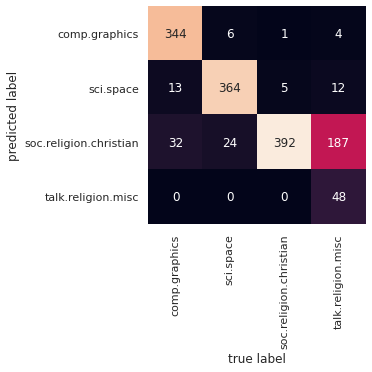

In [8]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');



In [9]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [11]:
predict_category('sending a payload to the ISS')

'soc.religion.christian'

In [12]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [13]:
predict_category('determining the screen resolution')

'comp.graphics'